In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

#variables
labels=()
axis=()
#Read the labels and case results
labels_df = pd.read_csv("NEISS_FMT.TXT", delimiter = "	")
data_df = pd.read_csv("NEISS.TXT", delimiter = "	")
body_df = pd.read_csv("body parts.csv")

In [2]:
#Displaying the hospitalization data
data_df = pd.read_csv("NEISS.TXT", delimiter = "	")
data_df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,...,Fire_Involvement,Alcohol,Drug,Product_1,Product_2,Product_3,Narrative_1,Stratum,PSU,Weight
0,200113309,01/01/2020,54,1,1,NaN,2,76,59,NaN,...,0,0,0,5022,0,0,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...,L,5,56.2517
1,200113888,01/04/2020,27,1,1,NaN,1,30,71,PAIN,...,0,0,0,5022,0,0,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...,V,40,15.9992
2,200114014,01/03/2020,48,2,1,NaN,2,37,53,NaN,...,0,0,0,5022,0,0,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...,V,61,15.9992
3,200116084,01/06/2020,25,1,1,NaN,2,32,57,NaN,...,0,0,0,5022,0,0,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...,L,69,56.2517
4,200120088,01/07/2020,55,1,0,NaN,0,31,71,PAIN,...,0,0,0,5022,0,0,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...,V,35,15.9992


In [3]:
#Cleaning data by case number to make sure no duplicates were included
data_df.groupby('CPSC_Case_Number').nunique().sum()

Treatment_Date       833
Age                  833
Sex                  833
Race                 833
Other_Race            14
Hispanic             833
Body_Part            833
Diagnosis            833
Other_Diagnosis      113
Body_Part_2          395
Diagnosis_2          395
Other_Diagnosis_2     74
Disposition          833
Location             833
Fire_Involvement     833
Alcohol              833
Drug                 833
Product_1            833
Product_2            833
Product_3            833
Narrative_1          833
Stratum              833
PSU                  833
Weight               833
dtype: int64

In [4]:
#Deleting cells that do not relate to injury types
data_df=data_df.drop(columns=['Product_1','Product_2','Product_3','Weight','PSU','Stratum','Other_Race','Hispanic'])

In [5]:
#REASON FOR ERROR: I already deleted the cells and ran the code again
data_df

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Alcohol,Drug,Narrative_1
0,200113309,01/01/2020,54,1,1,76,59,NaN,87.0,53.0,NaN,1,0,0,0,0,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...
1,200113888,01/04/2020,27,1,1,30,71,PAIN,NaN,NaN,NaN,1,0,0,0,0,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...
2,200114014,01/03/2020,48,2,1,37,53,NaN,30.0,53.0,NaN,1,5,0,0,0,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...
3,200116084,01/06/2020,25,1,1,32,57,NaN,79.0,71.0,LOW BACK PAIN,1,0,0,0,0,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...
4,200120088,01/07/2020,55,1,0,31,71,PAIN,NaN,NaN,NaN,1,0,0,0,0,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,210222778,12/28/2020,10,1,0,76,59,NaN,75.0,62.0,NaN,1,0,0,0,0,10YOM PRESENTS WITH HEAD LACERATION. PT WAS RI...
829,210225336,12/25/2020,10,1,1,32,57,NaN,80.0,57.0,NaN,4,0,0,0,0,10YOM PRESENTS WITH RIGHT ARM PAIN AFTER RUNNI...
830,210225342,12/25/2020,11,1,1,75,62,NaN,75.0,59.0,NaN,1,0,0,0,0,11YOM PRESENTS WITH SCALP LACERATION; PER PATI...
831,210245286,12/28/2020,25,2,0,75,52,NaN,75.0,59.0,NaN,1,4,0,0,0,25YOF PRESENTS AFTER BEING HIT BY A CAR WHILE ...


In [6]:
#REASON FOR ERROR: I already deleted the cells and ran the code again
#Leaving this cell avilable if I want to delete more columns in the future
data_df=data_df.drop(columns=['Sex','Race','Location','Fire_Involvement','Alcohol','Drug'])

In [7]:
#This section I am going to delete rows
labels_df = pd.read_csv("NEISS_FMT.TXT", delimiter = "	")
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1244,RACE,2,2,BLACK/AFRICAN AMERICAN
1245,RACE,3,3,OTHER
1246,RACE,4,4,ASIAN
1247,RACE,5,5,AMERICAN INDIAN/ALASKA NATIVE


In [8]:
#Deleting row: AGELTTWO
bdypt_df = labels_df[labels_df['Format name'] == 'BDYPT']
#indexNames = labels_df[(labels_df['Format name'] == 'AGELTTWO')].index
#labels_df.drop(indexNames , inplace=True)
bdypt_df
# #Deleting row: AGELTTWO
# disp_df = labels_df[labels_df['Format name'] == 'DISP']
# #indexNames = labels_df[(labels_df['Format name'] == 'AGELTTWO')].index
# #labels_df.drop(indexNames , inplace=True)
# disp_df

,Format name,Starting value for format,Ending value for format,Format value label
28,BDYPT,0,0,0 - INTERNAL
29,BDYPT,30,30,30 - SHOULDER
30,BDYPT,31,31,31 - UPPER TRUNK
31,BDYPT,32,32,32 - ELBOW
32,BDYPT,33,33,33 - LOWER ARM
33,BDYPT,34,34,34 - WRIST
34,BDYPT,35,35,35 - KNEE
35,BDYPT,36,36,36 - LOWER LEG
36,BDYPT,37,37,37 - ANKLE
37,BDYPT,38,38,38 - PUBIC REGION


In [9]:
#Deleting row:RACE
indexNames = labels_df[(labels_df['Format name'] == 'RACE')].index 
labels_df.drop(indexNames , inplace=True) 

In [10]:
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [11]:
#Deleting row:FIRE
indexNames = labels_df[(labels_df['Format name'] == 'FIRE')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [12]:
#Deleting row:ALC_DRUG
indexNames = labels_df[(labels_df['Format name'] == 'ALC_DRUG')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [13]:
#Deleting row:LOC
indexNames = labels_df[(labels_df['Format name'] == 'LOC')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [14]:
#Deleting row:RACE
indexNames = labels_df[(labels_df['Format name'] == 'PROD')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
104,GENDER,2,2,FEMALE
105,HISP,.,.,NA before 2019
106,HISP,0,0,Unk/Not stated
107,HISP,1,1,Yes


In [15]:
##Deleting row:HISP
indexNames = labels_df[(labels_df['Format name'] == 'HISP')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
95,DISP,8,8,"8 - FATALITY INCL. DOA, DIED IN ER"
96,DISP,9,9,"9 - UNKNOWN, NOT STATED"
102,GENDER,0,0,UNKNOWN
103,GENDER,1,1,MALE


In [16]:
#Double checking that these are the rows I need
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
95,DISP,8,8,"8 - FATALITY INCL. DOA, DIED IN ER"
96,DISP,9,9,"9 - UNKNOWN, NOT STATED"
102,GENDER,0,0,UNKNOWN
103,GENDER,1,1,MALE


In [17]:
data_df

,CPSC_Case_Number,Treatment_Date,Age,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Narrative_1
0,200113309,01/01/2020,54,76,59,NaN,87.0,53.0,NaN,1,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...
1,200113888,01/04/2020,27,30,71,PAIN,NaN,NaN,NaN,1,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...
2,200114014,01/03/2020,48,37,53,NaN,30.0,53.0,NaN,1,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...
3,200116084,01/06/2020,25,32,57,NaN,79.0,71.0,LOW BACK PAIN,1,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...
4,200120088,01/07/2020,55,31,71,PAIN,NaN,NaN,NaN,1,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...
...,...,...,...,...,...,...,...,...,...,...,...
828,210222778,12/28/2020,10,76,59,NaN,75.0,62.0,NaN,1,10YOM PRESENTS WITH HEAD LACERATION. PT WAS RI...
829,210225336,12/25/2020,10,32,57,NaN,80.0,57.0,NaN,4,10YOM PRESENTS WITH RIGHT ARM PAIN AFTER RUNNI...
830,210225342,12/25/2020,11,75,62,NaN,75.0,59.0,NaN,1,11YOM PRESENTS WITH SCALP LACERATION; PER PATI...
831,210245286,12/28/2020,25,75,52,NaN,75.0,59.0,NaN,1,25YOF PRESENTS AFTER BEING HIT BY A CAR WHILE ...


In [18]:
bdypt_df = labels_df[labels_df['Format name'] == 'BDYPT']
bdypt_df

,Format name,Starting value for format,Ending value for format,Format value label
28,BDYPT,0,0,0 - INTERNAL
29,BDYPT,30,30,30 - SHOULDER
30,BDYPT,31,31,31 - UPPER TRUNK
31,BDYPT,32,32,32 - ELBOW
32,BDYPT,33,33,33 - LOWER ARM
33,BDYPT,34,34,34 - WRIST
34,BDYPT,35,35,35 - KNEE
35,BDYPT,36,36,36 - LOWER LEG
36,BDYPT,37,37,37 - ANKLE
37,BDYPT,38,38,38 - PUBIC REGION


In [19]:
bdypt_df['Starting value for format'] = pd.to_numeric(bdypt_df['Starting value for format'])
bdypt_df.info()
combined_df = data_df.merge(bdypt_df, how='inner', left_on='Body_Part', right_on='Starting value for format')
combined_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 28 to 57
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Format name                30 non-null     object
 1   Starting value for format  30 non-null     int64 
 2   Ending value for format    30 non-null     object
 3   Format value label         30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


<ipython-input-19-59049b325a26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdypt_df['Starting value for format'] = pd.to_numeric(bdypt_df['Starting value for format'])


,CPSC_Case_Number,Treatment_Date,Age,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Narrative_1,Format name,Starting value for format,Ending value for format,Format value label
0,200113309,01/01/2020,54,76,59,NaN,87.0,53.0,NaN,1,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...,BDYPT,76,76,76 - FACE
1,200130801,01/05/2020,31,76,59,NaN,NaN,NaN,NaN,1,31 YO M PT RIDING ELECTRIC SCOOTER FELL ONTO S...,BDYPT,76,76,76 - FACE
2,200157213,01/04/2020,7,76,59,NaN,75.0,62.0,NaN,1,7YOM RIDING ON ELECTRIC SCOOTER GOING 9MPH HIT...,BDYPT,76,76,76 - FACE
3,200220976,01/24/2020,25,76,59,NaN,85.0,68.0,NaN,1,25 YO M PT UNHELMETED WHEN HE FELL OFF THE ELE...,BDYPT,76,76,76 - FACE
4,200255755,01/08/2020,18,76,53,NaN,83.0,72.0,NaN,4,18YOM PRESENTED TO ED AFTER FALL FROM MOTORIZE...,BDYPT,76,76,76 - FACE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,201040595,10/05/2020,54,88,60,NaN,76.0,53.0,NaN,1,54YOM REPORTS HE WAS RIDING HIS ELECTRIC SCOOT...,BDYPT,88,88,88 - MOUTH
829,201115665,10/22/2020,20,88,59,NaN,85.0,68.0,NaN,1,20 YOM RIDING A MOTORIZED SCOOTER RAN A RED LI...,BDYPT,88,88,88 - MOUTH
830,201116042,11/03/2020,38,88,59,NaN,82.0,71.0,PAIN,1,"38 YOF STATES RIDING HER ELECTRIC SCOOTER, FEL...",BDYPT,88,88,88 - MOUTH
831,201209122,11/13/2020,16,88,59,NaN,NaN,NaN,NaN,1,16YOM FELL OFF AN ELECTRIC SCOOTER INTO A DITC...,BDYPT,88,88,88 - MOUTH


In [20]:
#ADDING DEPENDENCIES
# %matplotlib notebook

In [21]:
#Labeled injuries from label _df that I merged onto data_df for results
bodyinjury = combined_df.groupby('Format value label')

#counting Case number ID for group
count_ppl = bodyinjury['Format value label'].count()
count_ppl

Format value label
30 - SHOULDER           69
31 - UPPER TRUNK        46
32 - ELBOW              33
33 - LOWER ARM          42
34 - WRIST              35
35 - KNEE               77
36 - LOWER LEG          67
37 - ANKLE              56
38 - PUBIC REGION        1
75 - HEAD              141
76 - FACE               99
77 - EYEBALL             2
79 - LOWER TRUNK        41
80 - UPPER ARM          12
81 - UPPER LEG          11
82 - HAND               19
83 - FOOT               20
85 - ALL PARTS BODY      4
87 - NOT STATED/UNK      8
88 - MOUTH               9
89 - NECK               11
92 - FINGER             21
93 - TOE                 9
Name: Format value label, dtype: int64

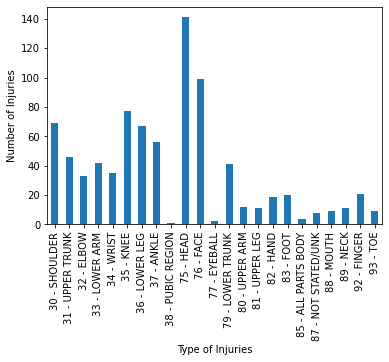

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a bar chart based off of the group series from before
injury_count = count_ppl.plot(kind='bar')

# Set the xlabel and ylabel using class methods
injury_count.set_xlabel("Type of Injuries")
injury_count.set_ylabel("Number of Injuries")


plt.show()
plt.savefig("injury_type.png")



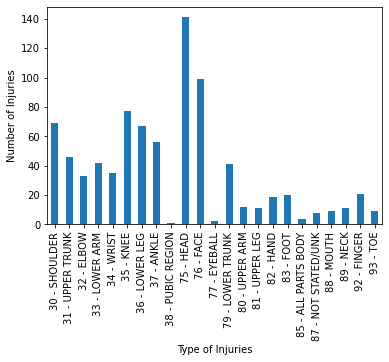

In [23]:
# Create a bar chart based off of the group series from before
injury_count = count_ppl.plot(kind='bar')

# Set the xlabel and ylabel using class methods
injury_count.set_xlabel("Type of Injuries")
injury_count.set_ylabel("Number of Injuries")


plt.show()
